# Grammar Learner 0.2: unified pipeline | `2018-04-06`
TL;DR:
- Separate category learning and grammar learning;
- **Category Learner**: word space based on connectors or disjuncts, PPMI-based vector space, SVM dimensionality reduction, k-means clustering;
- **Grammar Learner**: Link Grammar rules based on connector sets ("relaxed rules") or disjunct sets ("strict rules");
- Tests: 4 combinations of word space and grammar rules, details below. Test dataset: [http://88.99.210.144/data/clustering_2018/data/POC_English_NoAmb/poc_english_noamb_parse_ideal/](http://88.99.210.144/data/clustering_2018/data/POC_English_NoAmb/poc_english_noamb_parse_ideal/);
- Test results: [http://88.99.210.144/data/clustering_2018/AGI-2018/POC-English-NoAmb/mst_fixed_manually/](http://88.99.210.144/data/clustering_2018/AGI-2018/POC-English-NoAmb/mst_fixed_manually/)

- Tests on real data from OpenCog MST parser (coming): 
["POC-English-NoAmb" corpus](http://88.99.210.144/data/clustering_2018/AGI-2018/POC-English-NoAmb/), 
["POC-Turtle" corpus](http://88.99.210.144/data/clustering_2018/AGI-2018/POC-Turtle/).


A static html copy of this notebook is shared via  
[http://88.99.210.144/data/clustering_2018/html/Grammar-Learner-2-2018-04-06.html](http://88.99.210.144/data/clustering_2018/html/Grammar-Learner-2-2018-04-06.html)

## Introduction

In [1]:
import os, sys, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)
from src.utl.utl import UTC
from src.utl.read_files import check_dir
print(UTC(), module_path)
prefix = '' # option: every project output file will start with thid prefix (legacy, unused)
tmpath = module_path + '/tmp/'
check_dir(tmpath, True, 'none')
from src.grammar_learner.poc02 import learn_grammar

2018-04-07 10:03:11 UTC /home/obaskov/language-learning


Grammar Learner specification in [Unsupervised Language Learning (ULL) Design (DRAFT)](https://docs.google.com/document/d/14MpKLH5_5eVI39PRZuWLZHa1aUS73pJZNZzgigCWwWg/edit#bookmark=id.rtsrh3l8jgj3):
- Input
  - Directory to read parse files (1 to many input files)
  - Path to store learned categories
  - Path to store learned dictionary Link Grammar file
- Settings
  - Parse_mode, as one of the following
    - given - use all links as given (default)
    - exploded - explode all possible combinations of links given the sentence
  - learn_mode, as one of the following 
    - lexical_entries (default)
    - connectors_only
    - connectors_and_disjuncts (will have to see if it is possible - TODO)
  - TODO - else?
- Output
  - File with learned categories
  - File with learned grammar
  
_Settings amendments are suggested in the next section_

## Settings, parameters, data

In [2]:
# Directory to read parse files (1 to many input files)
input_dir = module_path + '/data/POC_English_NoAmb/mst_fixed_manually/'

# Paths to store learned categories, learned dictionary Link Grammar file
batch_dir = module_path + '/output/Grammar-Learner-2018-04-06/'
prj_dir = batch_dir + 'poc_english_noamb_mst_fixed/connectors-DRK-connectors/'
if check_dir(prj_dir, create=True, verbose='max'):
    cat_path = prj_dir  # Path to store learned categories
    dict_path = prj_dir # Path to store learned dictionary Link Grammar file
# The following test sample results are stored in separate directories specifies for each sample.

# Settings:
parse_mode = 'given'            # 'given' (default) / 'explosive' (next)
left_wall = 'LEFT-WALL'         # '','none' - don't use / 
                                # 'string' - replace ###LEFT-WALL### with the string
period = True                   # use period in links learning: True/False

learn_mode = 'connectors_only'  # 'lexical_entries' / 'connectors_only'
# learn_mode decomposed:
context = 1                     # 1: connectors / 0: 'words' /
                                # 2,3...: disjuncts with limited number of links
group = True                    # group items after link parsing, join counts 
window = 'mst'                  # 'mst' / reserved options for «explosive» parsing
weighting = 'ppmi'              # 'ppmi' / future options
    
word_space = 'vectors'          # 'vectors' / 'discrete' - no dimensionality reduction
dim_max = 100                   # max vector space dimensionality
sv_min = 0.1                    # minimal singular value (fraction of the max value)

dim_reduction = 'svm'           # 'svm' / 'none' (discrete word_space, group)

clustering = 'kmeans'           # 'kmeans' / 'group'~'identical_entries' / future options
cluster_range = (2,48,1)        # min, max, step
cluster_criteria = 'silhouette'
cluster_level = 0.9             # level = 0, 1, 0.-0.99..: 0 - max number of clusters

generalization = 'off'          # 'off' / future options: 'cosine', ...
merge = 0.8                     # merge clusters with similarity > this 'merge' criteria
aggregate = 0.2                 # agglomerate clusters with similarity > this criteria

grammar_rules = 1               # 1: 'connectors' / 2 - 'disjuncts' / 0 - 'words' (TODO?)

verbose='mid'   # display intermediate results: 'none', 'min', 'mid', 'max'

Directory /home/obaskov/language-learning/output/Grammar-Learner-2018-04-06/poc_english_noamb_mst_fixed/connectors-DRK-connectors/ exists.


# «Connectors - DRK* - connectors»
`* DRK -- dimension reduction and K-means clustering`

## Details

Directory /home/obaskov/language-learning/output/Grammar-Learner-2018-04-06/poc_english_noamb_mst_fixed/connectors-DRK-connectors/ exists.
files: ['/home/obaskov/language-learning/data/POC_English_NoAmb/mst_fixed_manually/poc_english_noamb_parse_ideal.txt']
20 unique words and 38 unique links form 124 unique word-link pairs from 124 parsed items


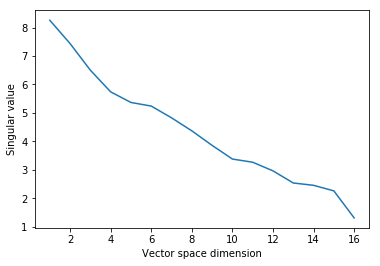

Vector space dimensionality = 16
Singular value (16) = 1.3
Max singular value (1) = 8.3
All singular values within relevance interval - more than 0.1 of max singular value
Silhouette index in a range of cluster numbers


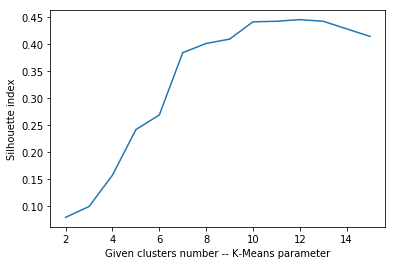

Optimal number of clusters: 8


Parent,Category,Quality,Words,Relevance
C00,C01,0.0,"['is', 'was']","[0, 0]"
C00,C02,0.0,"['LEFT-WALL', 'liked', 'likes']","[0, 0, 0]"
C00,C03,0.0,"['daughter', 'son']","[0, 0]"
C00,C04,0.0,"['dad', 'mom']","[0, 0]"
C00,C05,0.0,"['cake', 'sausage']","[0, 0]"
C00,C06,0.0,"['.', 'before', 'now']","[0, 0, 0]"
C00,C07,0.0,"['child', 'human', 'parent']","[0, 0, 0]"
C00,C08,0.0,"['a', 'food', 'not']","[0, 0, 0]"


<...>
Total 8 lines, saved to /home/obaskov/language-learning/output/Grammar-Learner-2018-04-06/poc_english_noamb_mst_fixed/connectors-DRK-connectors/categories.txt
list
        word  count cluster                              cluster_links
0          .     36     C06              [C06, C05-, C06-, C07-, C08-]
1  LEFT-WALL     40     C02        [C02, C01+, C03+, C04+, C05+, C08+]
2          a     60     C08  [C08, C01-, C02-, C03+, C04+, C07+, C08-]


Cluster,Germs,L,R,Disjuncts
C01,"['is', 'was']",[],[],"['{C02C01- or C03C01- or C04C01- or C05C01-} & {C01C08+}', '{C04C01- or C05C01-} & {C01C06+ or C01C08+}']"
C02,"['LEFT-WALL', 'liked', 'likes']",[],[],"['C02C01+ or C02C03+ or C02C04+ or C02C05+ or C02C08+', '{C04C02-} & {C02C05+ or C02C06+}', '{C03C02- or C04C02-} & {C02C05+}']"
C03,"['daughter', 'son']",[],[],"['{C02C03- or C08C03-} & {C03C01+ or C03C02+ or C03C06+}', '{C02C03- or C08C03-} & {C03C01+ or C03C02+ or C03C06+}']"
C04,"['dad', 'mom']",[],[],"['{C02C04- or C08C04-} & {C04C01+ or C04C02+}', '{C02C04- or C08C04-} & {C04C01+ or C04C02+}']"
C05,"['cake', 'sausage']",[],[],"['{C02C05-} & {C05C01+ or C05C06+}', '{C02C05-} & {C05C01+ or C05C06+}']"
C06,"['.', 'before', 'now']",[],[],"['C05C06- or C06C06- or C07C06- or C08C06-', '{C01C06- or C02C06- or C03C06- or C07C06- or C08C06-} & {C06C06+}', '{C05C06- or C07C06- or C08C06-} & {C06C06+}']"
C07,"['child', 'human', 'parent']",[],[],"['{C08C07-} & {C07C06+}', '{C08C07-} & {C07C06+}', '{C08C07-} & {C07C06+}']"
C08,"['a', 'food', 'not']",[],[],"['{C01C08- or C02C08- or C08C08-} & {C08C03+ or C08C04+ or C08C07+}', '{C01C08-} & {C08C06+}', '{C01C08-} & {C08C07+ or C08C08+}']"


In [3]:
context = 1         # 1: connectors / 2: 'dusjuncts'
grammar_rules = 1   # 1: connectors / 2+: 'dusjuncts'

# Paths to store learned categories, learned dictionary Link Grammar file
prj_dir = batch_dir + 'poc_english_noamb_mst_fixed/connectors-DRK-connectors/'
if check_dir(prj_dir, create=True, verbose='max'):
    cat_path = prj_dir  # Path to store learned categories
    dict_path = prj_dir # Path to store learned dictionary Link Grammar file

lg_rules_str = learn_grammar(input_dir, cat_path, dict_path, verbose, \
    parse_mode, context, group, left_wall, period, \
    word_space, dim_max, sv_min, dim_reduction, \
    clustering, cluster_range, cluster_criteria, cluster_level, tmpath,
    generalization, grammar_rules)

## Link Grammar dictionary

In [4]:
for line in lg_rules_str.splitlines(): print(line)

% POC English Link Grammar v.0.7 2018-04-07 10:03:12 UTC
<dictionary-version-number>: V0v0v7+;
<dictionary-locale>: EN4us+;

% C01
"is" "was":
({C02C01- or C03C01- or C04C01- or C05C01-} & {C01C08+}) or ({C04C01- or C05C01-} & {C01C06+ or C01C08+});

% C02
"LEFT-WALL" "liked" "likes":
(C02C01+ or C02C03+ or C02C04+ or C02C05+ or C02C08+) or ({C04C02-} & {C02C05+ or C02C06+}) or ({C03C02- or C04C02-} & {C02C05+});

% C03
"daughter" "son":
({C02C03- or C08C03-} & {C03C01+ or C03C02+ or C03C06+}) or ({C02C03- or C08C03-} & {C03C01+ or C03C02+ or C03C06+});

% C04
"dad" "mom":
({C02C04- or C08C04-} & {C04C01+ or C04C02+}) or ({C02C04- or C08C04-} & {C04C01+ or C04C02+});

% C05
"cake" "sausage":
({C02C05-} & {C05C01+ or C05C06+}) or ({C02C05-} & {C05C01+ or C05C06+});

% C06
"." "before" "now":
(C05C06- or C06C06- or C07C06- or C08C06-) or ({C01C06- or C02C06- or C03C06- or C07C06- or C08C06-} & {C06C06+}) or ({C05C06- or C07C06- or C08C06-} & {C06C06+});

% C07
"child" "human" "parent":
(

# «Connectors - DRK - Disjuncts»

## Details

Directory /home/obaskov/language-learning/output/Grammar-Learner-2018-04-06/poc_english_noamb_mst_fixed/connectors-DRK-disjuncts/ exists.
files: ['/home/obaskov/language-learning/data/POC_English_NoAmb/mst_fixed_manually/poc_english_noamb_parse_ideal.txt']
20 unique words and 38 unique links form 124 unique word-link pairs from 124 parsed items


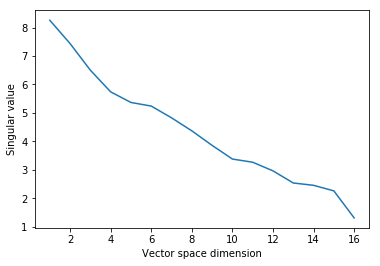

Vector space dimensionality = 16
Singular value (16) = 1.3
Max singular value (1) = 8.3
All singular values within relevance interval - more than 0.1 of max singular value
Silhouette index in a range of cluster numbers


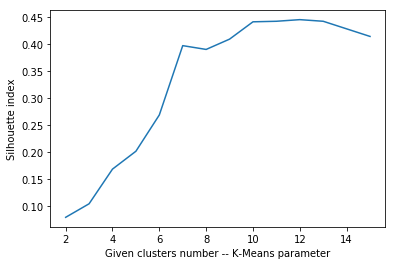

Optimal number of clusters: 9


Parent,Category,Quality,Words,Relevance
C00,C01,0.0,"['liked', 'likes']","[0, 0]"
C00,C02,0.0,"['is', 'was']","[0, 0]"
C00,C03,0.0,"['daughter', 'son']","[0, 0]"
C00,C04,0.0,"['dad', 'mom']","[0, 0]"
C00,C05,0.0,"['cake', 'sausage']","[0, 0]"
C00,C06,0.0,"['.', 'before', 'now']","[0, 0, 0]"
C00,C07,0.0,"['child', 'human', 'parent']","[0, 0, 0]"
C00,C08,0.0,"['food', 'not']","[0, 0]"
C00,C09,0.0,"['LEFT-WALL', 'a']","[0, 0]"


<...>
Total 9 lines, saved to /home/obaskov/language-learning/output/Grammar-Learner-2018-04-06/poc_english_noamb_mst_fixed/connectors-DRK-disjuncts/categories.txt
files: ['/home/obaskov/language-learning/data/POC_English_NoAmb/mst_fixed_manually/poc_english_noamb_parse_ideal.txt']
20 unique words and 70 unique links form 97 unique word-link pairs from 230 parsed items
list
        word  count cluster                                      cluster_links
0          .     35     C06                      [C06, C05-, C06-, C07-, C08-]
1  LEFT-WALL     35     C09  [C09, C02+ & C04+, C03+, C04+, C04+ & C02+, C0...
2          a     32     C09  [C09, C02-, C02- & C07+, C08-, C09- & C03+, C0...
type(stalks["disjuncts"]): <class 'pandas.core.series.Series'>


Cluster,Germs,L,R,Disjuncts
C01,"['liked', 'likes']",[],[],"['C04C01- & C01C05+ & C01C06+', 'C03C01- & C01C05+', 'C04C01- & C01C05+']"
C02,"['is', 'was']",[],[],"['C09C02- & C02C09+', 'C05C02- & C02C08+', 'C03C02- & C02C09+', 'C04C02- & C02C09+', 'C05C02- & C02C08+', 'C04C02- & C02C08+', 'C04C02- & C02C09+ & C02C06+']"
C03,"['daughter', 'son']",[],[],"['C09C03- & C03C01+', 'C03C06+', 'C09C03- & C03C02+', 'C09C03- & C03C01+', 'C03C06+', 'C09C03- & C03C02+']"
C04,"['dad', 'mom']",[],[],"['C09C04-', 'C09C04- & C04C02+', 'C09C04- & C04C01+', 'C09C04-', 'C09C04- & C04C02+', 'C09C04- & C04C01+']"
C05,"['cake', 'sausage']",[],[],"['C01C05- & C05C06+', 'C09C05- & C05C02+', 'C01C05-', 'C01C05- & C05C06+', 'C09C05- & C05C02+', 'C01C05-']"
C06,"['.', 'before', 'now']",[],[],"['C05C06-', 'C08C06-', 'C07C06-', 'C06C06-', 'C01C06- & C06C06+', 'C07C06- & C06C06+', 'C08C06- & C06C06+', 'C02C06- & C03C06- & C06C06+', 'C07C06- & C06C06+', 'C08C06- & C06C06+', 'C05C06- & C06C06+']"
C07,"['child', 'human', 'parent']",[],[],"['C09C07- & C07C06+', 'C09C07- & C07C06+', 'C08C07- & C07C06+', 'C09C07- & C07C06+']"
C08,"['food', 'not']",[],[],"['C02C08- & C08C06+', 'C02C08- & C08C09+ & C08C07+']"
C09,"['LEFT-WALL', 'a']",[],[],"['C09C03+', 'C09C09+', 'C09C04+ & C09C02+', 'C09C05+', 'C09C02+ & C09C04+', 'C09C04+', 'C08C09-', 'C02C09-', 'C09C09- & C09C04+', 'C09C09- & C09C03+', 'C02C09- & C09C07+']"


In [5]:
context = 1         # 1: connectors / 2: 'dusjuncts'
grammar_rules = 2   # 1: connectors / 2+: 'dusjuncts'

# Paths to store learned categories, learned dictionary Link Grammar file
prj_dir = batch_dir + 'poc_english_noamb_mst_fixed/connectors-DRK-disjuncts/'
if check_dir(prj_dir, create=True, verbose='max'):
    cat_path = prj_dir  # Path to store learned categories
    dict_path = prj_dir # Path to store learned dictionary Link Grammar file

lg_rules_str = learn_grammar(input_dir, cat_path, dict_path, verbose, \
    parse_mode, context, group, left_wall, period, \
    word_space, dim_max, sv_min, dim_reduction, \
    clustering, cluster_range, cluster_criteria, cluster_level, tmpath,
    generalization, grammar_rules)

## Link Grammar dictionary

In [6]:
for line in lg_rules_str.splitlines(): print(line)

% POC English Link Grammar v.0.7 2018-04-07 10:03:13 UTC
<dictionary-version-number>: V0v0v7+;
<dictionary-locale>: EN4us+;

% C01
"liked" "likes":
(C04C01- & C01C05+ & C01C06+) or (C03C01- & C01C05+) or (C04C01- & C01C05+);

% C02
"is" "was":
(C09C02- & C02C09+) or (C05C02- & C02C08+) or (C03C02- & C02C09+) or (C04C02- & C02C09+) or (C05C02- & C02C08+) or (C04C02- & C02C08+) or (C04C02- & C02C09+ & C02C06+);

% C03
"daughter" "son":
(C09C03- & C03C01+) or (C03C06+) or (C09C03- & C03C02+) or (C09C03- & C03C01+) or (C03C06+) or (C09C03- & C03C02+);

% C04
"dad" "mom":
(C09C04-) or (C09C04- & C04C02+) or (C09C04- & C04C01+) or (C09C04-) or (C09C04- & C04C02+) or (C09C04- & C04C01+);

% C05
"cake" "sausage":
(C01C05- & C05C06+) or (C09C05- & C05C02+) or (C01C05-) or (C01C05- & C05C06+) or (C09C05- & C05C02+) or (C01C05-);

% C06
"." "before" "now":
(C05C06-) or (C08C06-) or (C07C06-) or (C06C06-) or (C01C06- & C06C06+) or (C07C06- & C06C06+) or (C08C06- & C06C06+) or (C02C06- & C03C06- & 

# «Disjuncts - DRK - Disjuncts»

## Details

Directory /home/obaskov/language-learning/output/Grammar-Learner-2018-04-06/poc_english_noamb_mst_fixed/disjuncts-DRK-disjuncts/ exists.
files: ['/home/obaskov/language-learning/data/POC_English_NoAmb/mst_fixed_manually/poc_english_noamb_parse_ideal.txt']
20 unique words and 70 unique links form 97 unique word-link pairs from 230 parsed items


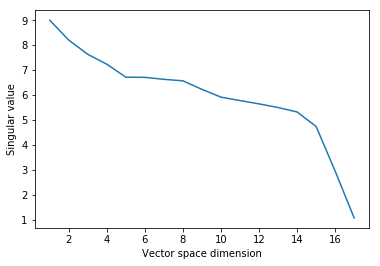

Vector space dimensionality = 17
Singular value (17) = 1.1
Max singular value (1) = 9.0
All singular values within relevance interval - more than 0.1 of max singular value
Silhouette index in a range of cluster numbers


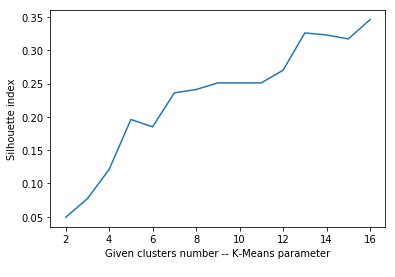

Optimal number of clusters: 13


Parent,Category,Quality,Words,Relevance
C00,C01,0.0,"['dad', 'mom']","[0, 0]"
C00,C02,0.0,"['daughter', 'son']","[0, 0]"
C00,C03,0.0,"['cake', 'sausage']","[0, 0]"
C00,C04,0.0,['LEFT-WALL'],[0]
C00,C05,0.0,['.'],[0]
C00,C06,0.0,"['before', 'now']","[0, 0]"
C00,C07,0.0,['not'],[0]
C00,C08,0.0,"['child', 'human', 'parent']","[0, 0, 0]"
C00,C09,0.0,['food'],[0]
C00,C10,0.0,['a'],[0]


<...>
Total 13 lines, saved to /home/obaskov/language-learning/output/Grammar-Learner-2018-04-06/poc_english_noamb_mst_fixed/disjuncts-DRK-disjuncts/categories.txt
list
        word  count cluster                                      cluster_links
0          .     35     C05                      [C05, C03-, C06-, C08-, C09-]
1  LEFT-WALL     35     C04  [C04, C01+, C01+ & C13+, C02+, C03+, C10+, C13...
2          a     32     C10  [C10, C04- & C01+, C04- & C02+, C07-, C13-, C1...
type(stalks["disjuncts"]): <class 'pandas.core.series.Series'>


Cluster,Germs,L,R,Disjuncts
C01,"['dad', 'mom']",[],[],"['C04C01- & C01C13+', 'C10C01- & C01C11+', 'C04C01- & C01C11+', 'C04C01- & C01C12+', 'C10C01- & C01C13+', 'C04C01-', 'C04C01- & C01C13+', 'C10C01- & C01C11+', 'C04C01- & C01C11+', 'C04C01- & C01C12+', 'C10C01- & C01C13+', 'C04C01-']"
C02,"['daughter', 'son']",[],[],"['C02C06+', 'C10C02- & C02C11+', 'C10C02- & C02C13+', 'C04C02- & C02C13+', 'C04C02- & C02C11+', 'C02C06+', 'C10C02- & C02C11+', 'C10C02- & C02C13+', 'C04C02- & C02C13+', 'C04C02- & C02C11+']"
C03,"['cake', 'sausage']",[],[],"['C04C03- & C03C13+', 'C12C03-', 'C11C03- & C03C05+', 'C11C03- & C03C06+', 'C04C03- & C03C13+', 'C12C03-', 'C11C03- & C03C05+', 'C11C03- & C03C06+']"
C04,['LEFT-WALL'],[],[],"['C04C13+ & C04C01+', 'C04C01+ & C04C13+', 'C04C10+', 'C04C03+', 'C04C02+', 'C04C01+']"
C05,['.'],[],[],"['C03C05-', 'C08C05-', 'C06C05-', 'C09C05-']"
C06,"['before', 'now']",[],[],"['C12C06- & C06C05+', 'C13C06- & C02C06- & C06C05+', 'C08C06- & C06C05+', 'C09C06- & C06C05+', 'C03C06- & C06C05+', 'C08C06- & C06C05+', 'C09C06- & C06C05+']"
C07,['not'],[],[],['C13C07- & C07C10+ & C07C08+']
C08,"['child', 'human', 'parent']",[],[],"['C10C08- & C08C06+', 'C10C08- & C08C05+', 'C10C08- & C08C06+', 'C10C08- & C08C05+', 'C10C08- & C08C05+', 'C10C08- & C08C06+', 'C07C08- & C08C06+']"
C09,['food'],[],[],"['C13C09- & C09C06+', 'C13C09- & C09C05+']"
C10,['a'],[],[],"['C04C10- & C10C01+', 'C07C10-', 'C04C10- & C10C02+', 'C13C10-', 'C13C10- & C10C08+']"


In [7]:
context = 2         # 1: connectors / 2: 'dusjuncts'
grammar_rules = 2   # 1: connectors / 2+: 'dusjuncts'

# Paths to store learned categories, learned dictionary Link Grammar file
prj_dir = batch_dir + 'poc_english_noamb_mst_fixed/disjuncts-DRK-disjuncts/'
if check_dir(prj_dir, create=True, verbose='max'):
    cat_path = prj_dir  # Path to store learned categories
    dict_path = prj_dir # Path to store learned dictionary Link Grammar file

lg_rules_str = learn_grammar(input_dir, cat_path, dict_path, verbose, \
    parse_mode, context, group, left_wall, period, \
    word_space, dim_max, sv_min, dim_reduction, \
    clustering, cluster_range, cluster_criteria, cluster_level, tmpath,
    generalization, grammar_rules)

## Link Grammar dictionary

In [8]:
for line in lg_rules_str.splitlines(): print(line)

% POC English Link Grammar v.0.7 2018-04-07 10:03:14 UTC
<dictionary-version-number>: V0v0v7+;
<dictionary-locale>: EN4us+;

% C01
"dad" "mom":
(C04C01- & C01C13+) or (C10C01- & C01C11+) or (C04C01- & C01C11+) or (C04C01- & C01C12+) or (C10C01- & C01C13+) or (C04C01-) or (C04C01- & C01C13+) or (C10C01- & C01C11+) or (C04C01- & C01C11+) or (C04C01- & C01C12+) or (C10C01- & C01C13+) or (C04C01-);

% C02
"daughter" "son":
(C02C06+) or (C10C02- & C02C11+) or (C10C02- & C02C13+) or (C04C02- & C02C13+) or (C04C02- & C02C11+) or (C02C06+) or (C10C02- & C02C11+) or (C10C02- & C02C13+) or (C04C02- & C02C13+) or (C04C02- & C02C11+);

% C03
"cake" "sausage":
(C04C03- & C03C13+) or (C12C03-) or (C11C03- & C03C05+) or (C11C03- & C03C06+) or (C04C03- & C03C13+) or (C12C03-) or (C11C03- & C03C05+) or (C11C03- & C03C06+);

% C04
"LEFT-WALL":
(C04C13+ & C04C01+) or (C04C01+ & C04C13+) or (C04C10+) or (C04C03+) or (C04C02+) or (C04C01+);

% C05
".":
(C03C05-) or (C08C05-) or (C06C05-) or (C09C05-);

% C

# «Disjuncts - DRK - Connectors»

## Details

Directory /home/obaskov/language-learning/output/Grammar-Learner-2018-04-06/poc_english_noamb_mst_fixed/disjuncts-DRK-connectors/ exists.
files: ['/home/obaskov/language-learning/data/POC_English_NoAmb/mst_fixed_manually/poc_english_noamb_parse_ideal.txt']
20 unique words and 70 unique links form 97 unique word-link pairs from 230 parsed items


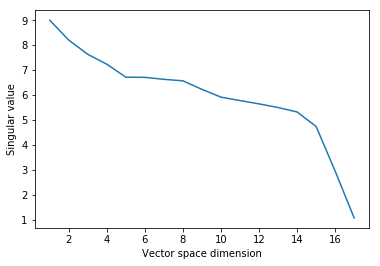

Vector space dimensionality = 17
Singular value (17) = 1.1
Max singular value (1) = 9.0
All singular values within relevance interval - more than 0.1 of max singular value
Silhouette index in a range of cluster numbers


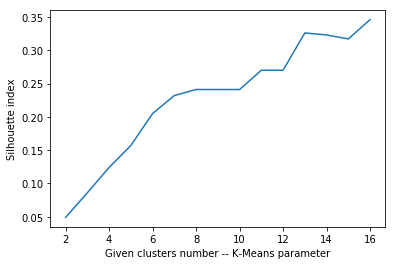

Optimal number of clusters: 13


Parent,Category,Quality,Words,Relevance
C00,C01,0.0,"['dad', 'mom']","[0, 0]"
C00,C02,0.0,"['daughter', 'son']","[0, 0]"
C00,C03,0.0,"['cake', 'sausage']","[0, 0]"
C00,C04,0.0,"['child', 'human', 'parent']","[0, 0, 0]"
C00,C05,0.0,"['before', 'now']","[0, 0]"
C00,C06,0.0,['a'],[0]
C00,C07,0.0,['likes'],[0]
C00,C08,0.0,['not'],[0]
C00,C09,0.0,['LEFT-WALL'],[0]
C00,C10,0.0,['liked'],[0]


<...>
Total 13 lines, saved to /home/obaskov/language-learning/output/Grammar-Learner-2018-04-06/poc_english_noamb_mst_fixed/disjuncts-DRK-connectors/categories.txt
files: ['/home/obaskov/language-learning/data/POC_English_NoAmb/mst_fixed_manually/poc_english_noamb_parse_ideal.txt']
20 unique words and 38 unique links form 124 unique word-link pairs from 124 parsed items
list
        word  count cluster                              cluster_links
0          .     36     C11              [C11, C03-, C04-, C05-, C12-]
1  LEFT-WALL     40     C09        [C09, C01+, C02+, C03+, C06+, C13+]
2          a     60     C06  [C06, C01+, C02+, C04+, C08-, C09-, C13-]


Cluster,Germs,L,R,Disjuncts
C01,"['dad', 'mom']",[],[],"['{C06C01- or C09C01-} & {C01C07+ or C01C10+ or C01C13+}', '{C06C01- or C09C01-} & {C01C07+ or C01C10+ or C01C13+}']"
C02,"['daughter', 'son']",[],[],"['{C06C02- or C09C02-} & {C02C05+ or C02C07+ or C02C13+}', '{C06C02- or C09C02-} & {C02C05+ or C02C07+ or C02C13+}']"
C03,"['cake', 'sausage']",[],[],"['{C07C03- or C09C03- or C10C03-} & {C03C05+ or C03C11+ or C03C13+}', '{C07C03- or C09C03- or C10C03-} & {C03C05+ or C03C11+ or C03C13+}']"
C04,"['child', 'human', 'parent']",[],[],"['{C06C04-} & {C04C05+ or C04C11+}', '{C06C04-} & {C04C05+ or C04C11+}', '{C06C04- or C08C04-} & {C04C05+ or C04C11+}']"
C05,"['before', 'now']",[],[],"['{C02C05- or C04C05- or C10C05- or C12C05- or C13C05-} & {C05C11+}', '{C03C05- or C04C05- or C12C05-} & {C05C11+}']"
C06,['a'],[],[],['{C08C06- or C09C06- or C13C06-} & {C06C01+ or C06C02+ or C06C04+}']
C07,['likes'],[],[],['{C01C07- or C02C07-} & {C07C03+}']
C08,['not'],[],[],['{C13C08-} & {C08C04+ or C08C06+}']
C09,['LEFT-WALL'],[],[],['C09C01+ or C09C02+ or C09C03+ or C09C06+ or C09C13+']
C10,['liked'],[],[],['{C01C10-} & {C10C03+ or C10C05+}']


In [9]:
context = 2         # 1: connectors / 2: 'dusjuncts'
grammar_rules = 1   # 1: connectors / 2+: 'dusjuncts'

# Paths to store learned categories, learned dictionary Link Grammar file
prj_dir = batch_dir + 'poc_english_noamb_mst_fixed/disjuncts-DRK-connectors/'
if check_dir(prj_dir, create=True, verbose='max'):
    cat_path = prj_dir  # Path to store learned categories
    dict_path = prj_dir # Path to store learned dictionary Link Grammar file

lg_rules_str = learn_grammar(input_dir, cat_path, dict_path, verbose, \
    parse_mode, context, group, left_wall, period, \
    word_space, dim_max, sv_min, dim_reduction, \
    clustering, cluster_range, cluster_criteria, cluster_level, tmpath,
    generalization, grammar_rules)

## Link Grammar dictionary

In [10]:
for line in lg_rules_str.splitlines(): print(line)

% POC English Link Grammar v.0.7 2018-04-07 10:03:16 UTC
<dictionary-version-number>: V0v0v7+;
<dictionary-locale>: EN4us+;

% C01
"dad" "mom":
({C06C01- or C09C01-} & {C01C07+ or C01C10+ or C01C13+}) or ({C06C01- or C09C01-} & {C01C07+ or C01C10+ or C01C13+});

% C02
"daughter" "son":
({C06C02- or C09C02-} & {C02C05+ or C02C07+ or C02C13+}) or ({C06C02- or C09C02-} & {C02C05+ or C02C07+ or C02C13+});

% C03
"cake" "sausage":
({C07C03- or C09C03- or C10C03-} & {C03C05+ or C03C11+ or C03C13+}) or ({C07C03- or C09C03- or C10C03-} & {C03C05+ or C03C11+ or C03C13+});

% C04
"child" "human" "parent":
({C06C04-} & {C04C05+ or C04C11+}) or ({C06C04-} & {C04C05+ or C04C11+}) or ({C06C04- or C08C04-} & {C04C05+ or C04C11+});

% C05
"before" "now":
({C02C05- or C04C05- or C10C05- or C12C05- or C13C05-} & {C05C11+}) or ({C03C05- or C04C05- or C12C05-} & {C05C11+});

% C06
"a":
({C08C06- or C09C06- or C13C06-} & {C06C01+ or C06C02+ or C06C04+});

% C07
"likes":
({C01C07- or C02C07-} & {C07C03+});
